In [3]:
!pip install rouge

In [1]:
import pandas as pd

# Load the Excel file
file_path = '/content/Summary_Notebook.xlsx'

# Reading the Excel file to check the sheet names
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names
sheet_names


['STS_Summary',
 'Lymphoma_Summary',
 'Hemangiosarcoma_Summary',
 'DiagnosticCT_Summary']

# Token_Words_AI vs Token_Words_CP - Concatenated

In [2]:
import pandas as pd
import numpy as np

# Function to tokenize text and create n-grams
def create_ngrams(text, n):
    tokens = text.split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return set(ngrams)

# Function to calculate ROUGE-N score
def rouge_n_score(system_generated, reference, n):
    system_ngrams = create_ngrams(system_generated, n)
    reference_ngrams = create_ngrams(reference, n)

    if not system_ngrams or not reference_ngrams:
        return 0.0

    overlapping_ngrams = system_ngrams.intersection(reference_ngrams)
    recall = len(overlapping_ngrams) / len(reference_ngrams)
    precision = len(overlapping_ngrams) / len(system_ngrams)
    f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0.0

    return f_measure

# Function to calculate average ROUGE-1 and ROUGE-2 scores for a sheet, treating the entire column as a single document
def calculate_rouge_scores_whole_document(sheet_name):
    data = pd.read_excel(excel_data, sheet_name=sheet_name)

    # Drop NaN values and concatenate all rows in the columns into single strings
    ai_text = ' '.join(data['Token_Words_AI'].dropna().astype(str))
    reference_text = ' '.join(data['Token_Words_CP'].dropna().astype(str))

    # Calculate ROUGE-1 and ROUGE-2 scores
    rouge_1 = rouge_n_score(ai_text, reference_text, 1)
    rouge_2 = rouge_n_score(ai_text, reference_text, 2)

    return rouge_1, rouge_2


# Path to the Excel file
file_path = '/content/Summary_Notebook.xlsx'

# Reading the Excel file to get sheet names
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names

# Calculating ROUGE scores for each sheet treating the entire column as a single document
sheet_rouge_scores_whole_document = {sheet: calculate_rouge_scores_whole_document(sheet) for sheet in sheet_names}


In [3]:
# Path to the Excel file (adjust this according to your file's location)
file_path = '/content/Summary_Notebook.xlsx'

# Reading the Excel file to get sheet names
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names

# Calculating ROUGE scores for each sheet treating the entire column as a single document
sheet_rouge_scores_whole_document = {sheet: calculate_rouge_scores_whole_document(sheet) for sheet in sheet_names}

# Displaying the results
import pandas as pd
results_df = pd.DataFrame(sheet_rouge_scores_whole_document, index=['ROUGE-1', 'ROUGE-2']).T
results_df


,ROUGE-1,ROUGE-2
STS_Summary,0.608466,0.282105
Lymphoma_Summary,0.670185,0.305284
Hemangiosarcoma_Summary,0.754183,0.401372
DiagnosticCT_Summary,0.744654,0.391736


This code first defines functions for creating n-grams and calculating ROUGE-N scores. Then, for each sheet in the Excel file, it concatenates all rows of the 'Token_Words_AI' and 'Token_Words_CP' columns into single strings. It calculates the ROUGE-1 and ROUGE-2 scores using these concatenated texts, which is a more appropriate method when the data in the two columns may not align row-by-row.

## ROUGE F1, Precision, Recall - AI vs CP

In [4]:
# Function to calculate precision, recall, and F1 score for ROUGE-N
def calculate_precision_recall_f1(system_generated, reference, n):
    system_ngrams = create_ngrams(system_generated, n)
    reference_ngrams = create_ngrams(reference, n)

    if not system_ngrams or not reference_ngrams:
        return 0.0, 0.0, 0.0

    overlapping_ngrams = system_ngrams.intersection(reference_ngrams)
    precision = len(overlapping_ngrams) / len(system_ngrams)
    recall = len(overlapping_ngrams) / len(reference_ngrams)
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0.0

    return precision, recall, f1_score

# Function to calculate precision, recall, and F1 for ROUGE-1 and ROUGE-2 for a sheet
def calculate_metrics_whole_document(sheet_name):
    data = pd.read_excel(excel_data, sheet_name=sheet_name)

    # Drop NaN values and concatenate all rows in the columns into single strings
    ai_text = ' '.join(data['Token_Words_AI'].dropna().astype(str))
    reference_text = ' '.join(data['Token_Words_CP'].dropna().astype(str))

    # Calculate precision, recall, and F1 for ROUGE-1
    precision_1, recall_1, f1_1 = calculate_precision_recall_f1(ai_text, reference_text, 1)

    # Calculate precision, recall, and F1 for ROUGE-2
    precision_2, recall_2, f1_2 = calculate_precision_recall_f1(ai_text, reference_text, 2)

    return {
        'ROUGE-1 Precision': precision_1,
        'ROUGE-1 Recall': recall_1,
        'ROUGE-1 F1 Score': f1_1,
        'ROUGE-2 Precision': precision_2,
        'ROUGE-2 Recall': recall_2,
        'ROUGE-2 F1 Score': f1_2
    }

# Calculating precision, recall, and F1 for each sheet treating the entire column as a single document
sheet_metrics = {sheet: calculate_metrics_whole_document(sheet) for sheet in sheet_names}
sheet_metrics



{'STS_Summary': {'ROUGE-1 Precision': 0.7142857142857143,
  'ROUGE-1 Recall': 0.5299539170506913,
  'ROUGE-1 F1 Score': 0.6084656084656084,
  'ROUGE-2 Precision': 0.33668341708542715,
  'ROUGE-2 Recall': 0.2427536231884058,
  'ROUGE-2 F1 Score': 0.28210526315789475},
 'Lymphoma_Summary': {'ROUGE-1 Precision': 0.6318407960199005,
  'ROUGE-1 Recall': 0.7134831460674157,
  'ROUGE-1 F1 Score': 0.6701846965699209,
  'ROUGE-2 Precision': 0.29213483146067415,
  'ROUGE-2 Recall': 0.319672131147541,
  'ROUGE-2 F1 Score': 0.30528375733855184},
 'Hemangiosarcoma_Summary': {'ROUGE-1 Precision': 0.7532133676092545,
  'ROUGE-1 Recall': 0.7551546391752577,
  'ROUGE-1 F1 Score': 0.7541827541827542,
  'ROUGE-2 Precision': 0.37142857142857144,
  'ROUGE-2 Recall': 0.43656716417910446,
  'ROUGE-2 F1 Score': 0.4013722126929674},
 'DiagnosticCT_Summary': {'ROUGE-1 Precision': 0.7789473684210526,
  'ROUGE-1 Recall': 0.7132530120481928,
  'ROUGE-1 F1 Score': 0.7446540880503145,
  'ROUGE-2 Precision': 0.384740

## AI vs CP Rouge Average Statistics

In [5]:
# Initialize dictionaries to sum up the scores for ROUGE-1 and ROUGE-2
rouge_1_scores_total = {'Precision': 0, 'Recall': 0, 'F1 Score': 0}
rouge_2_scores_total = {'Precision': 0, 'Recall': 0, 'F1 Score': 0}
num_sheets = len(sheet_metrics)

# Summing up the scores for each sheet
for scores in sheet_metrics.values():
    rouge_1_scores_total['Precision'] += scores['ROUGE-1 Precision']
    rouge_1_scores_total['Recall'] += scores['ROUGE-1 Recall']
    rouge_1_scores_total['F1 Score'] += scores['ROUGE-1 F1 Score']

    rouge_2_scores_total['Precision'] += scores['ROUGE-2 Precision']
    rouge_2_scores_total['Recall'] += scores['ROUGE-2 Recall']
    rouge_2_scores_total['F1 Score'] += scores['ROUGE-2 F1 Score']

# Calculating the average for each metric
rouge_1_average = {key: value / num_sheets for key, value in rouge_1_scores_total.items()}
rouge_2_average = {key: value / num_sheets for key, value in rouge_2_scores_total.items()}

rouge_1_average, rouge_2_average



({'Precision': 0.7195718115839804,
  'Recall': 0.6779611785853894,
  'F1 Score': 0.6943717868171495},
 {'Precision': 0.34624676992873316,
  'Recall': 0.34949570437623756,
  'F1 Score': 0.34512419259487415})

# ROUGE Token_Words_AI vs Token_Words_AP - Concatenated

In [6]:
import pandas as pd
import numpy as np

# Function to tokenize text and create n-grams
def create_ngrams(text, n):
    tokens = text.split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return set(ngrams)

# Function to calculate ROUGE-N score
def rouge_n_score(system_generated, reference, n):
    system_ngrams = create_ngrams(system_generated, n)
    reference_ngrams = create_ngrams(reference, n)

    if not system_ngrams or not reference_ngrams:
        return 0.0

    overlapping_ngrams = system_ngrams.intersection(reference_ngrams)
    recall = len(overlapping_ngrams) / len(reference_ngrams)
    precision = len(overlapping_ngrams) / len(system_ngrams)
    f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0.0

    return f_measure

# Function to calculate average ROUGE-1 and ROUGE-2 scores for a sheet, treating the entire column as a single document
def calculate_rouge_scores_whole_document(sheet_name):
    data = pd.read_excel(excel_data, sheet_name=sheet_name)

    # Drop NaN values and concatenate all rows in the columns into single strings
    ai_text = ' '.join(data['Token_Words_AI'].dropna().astype(str))
    reference_text = ' '.join(data['Token_Words_AP'].dropna().astype(str))

    # Calculate ROUGE-1 and ROUGE-2 scores
    rouge_1 = rouge_n_score(ai_text, reference_text, 1)
    rouge_2 = rouge_n_score(ai_text, reference_text, 2)

    return rouge_1, rouge_2

# Path to the Excel file
file_path = '/content/Summary_Notebook.xlsx'

# Reading the Excel file to get sheet names
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names

# Calculating ROUGE scores for each sheet treating the entire column as a single document
sheet_rouge_scores_whole_document = {sheet: calculate_rouge_scores_whole_document(sheet) for sheet in sheet_names}

In [7]:
# Path to the Excel file (adjust this according to your file's location)
file_path = '/content/Summary_Notebook.xlsx'

# Reading the Excel file to get sheet names
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names

# Calculating ROUGE scores for each sheet treating the entire column as a single document
sheet_rouge_scores_whole_document = {sheet: calculate_rouge_scores_whole_document(sheet) for sheet in sheet_names}

# Displaying the results
import pandas as pd
results_df = pd.DataFrame(sheet_rouge_scores_whole_document, index=['ROUGE-1', 'ROUGE-2']).T
results_df

,ROUGE-1,ROUGE-2
STS_Summary,0.579088,0.262222
Lymphoma_Summary,0.634761,0.261538
Hemangiosarcoma_Summary,0.691566,0.327600
DiagnosticCT_Summary,0.738208,0.394984


## F1, Precision, Recall - AI vs AP

In [8]:
# Function to calculate precision, recall, and F1 score for ROUGE-N
def calculate_precision_recall_f1(system_generated, reference, n):
    system_ngrams = create_ngrams(system_generated, n)
    reference_ngrams = create_ngrams(reference, n)

    if not system_ngrams or not reference_ngrams:
        return 0.0, 0.0, 0.0

    overlapping_ngrams = system_ngrams.intersection(reference_ngrams)
    precision = len(overlapping_ngrams) / len(system_ngrams)
    recall = len(overlapping_ngrams) / len(reference_ngrams)
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0.0

    return precision, recall, f1_score

# Function to calculate precision, recall, and F1 for ROUGE-1 and ROUGE-2 for a sheet
def calculate_metrics_whole_document(sheet_name):
    data = pd.read_excel(excel_data, sheet_name=sheet_name)

    # Drop NaN values and concatenate all rows in the columns into single strings
    ai_text = ' '.join(data['Token_Words_AI'].dropna().astype(str))
    reference_text = ' '.join(data['Token_Words_AP'].dropna().astype(str))

    # Calculate precision, recall, and F1 for ROUGE-1
    precision_1, recall_1, f1_1 = calculate_precision_recall_f1(ai_text, reference_text, 1)

    # Calculate precision, recall, and F1 for ROUGE-2
    precision_2, recall_2, f1_2 = calculate_precision_recall_f1(ai_text, reference_text, 2)

    return {
        'ROUGE-1 Precision': precision_1,
        'ROUGE-1 Recall': recall_1,
        'ROUGE-1 F1 Score': f1_1,
        'ROUGE-2 Precision': precision_2,
        'ROUGE-2 Recall': recall_2,
        'ROUGE-2 F1 Score': f1_2
    }

# Calculating precision, recall, and F1 for each sheet treating the entire column as a single document
sheet_metrics = {sheet: calculate_metrics_whole_document(sheet) for sheet in sheet_names}
sheet_metrics

{'STS_Summary': {'ROUGE-1 Precision': 0.6708074534161491,
  'ROUGE-1 Recall': 0.5094339622641509,
  'ROUGE-1 F1 Score': 0.579088471849866,
  'ROUGE-2 Precision': 0.2964824120603015,
  'ROUGE-2 Recall': 0.2350597609561753,
  'ROUGE-2 F1 Score': 0.2622222222222222},
 'Lymphoma_Summary': {'ROUGE-1 Precision': 0.6268656716417911,
  'ROUGE-1 Recall': 0.6428571428571429,
  'ROUGE-1 F1 Score': 0.6347607052896727,
  'ROUGE-2 Precision': 0.2546816479400749,
  'ROUGE-2 Recall': 0.26877470355731226,
  'ROUGE-2 F1 Score': 0.26153846153846155},
 'Hemangiosarcoma_Summary': {'ROUGE-1 Precision': 0.7377892030848329,
  'ROUGE-1 Recall': 0.6507936507936508,
  'ROUGE-1 F1 Score': 0.6915662650602409,
  'ROUGE-2 Precision': 0.31746031746031744,
  'ROUGE-2 Recall': 0.338409475465313,
  'ROUGE-2 F1 Score': 0.32760032760032753},
 'DiagnosticCT_Summary': {'ROUGE-1 Precision': 0.8236842105263158,
  'ROUGE-1 Recall': 0.6688034188034188,
  'ROUGE-1 F1 Score': 0.7382075471698112,
  'ROUGE-2 Precision': 0.409090909

#Combined ROUGE Statistics

In [9]:
# Function to calculate precision, recall, and F1 for ROUGE-1 and ROUGE-2 between two text columns for a sheet
def calculate_metrics_between_columns(sheet_name, col1, col2):
    data = pd.read_excel(excel_data, sheet_name=sheet_name)

    # Concatenating all rows in the columns into single strings
    text1 = ' '.join(data[col1].astype(str))
    text2 = ' '.join(data[col2].astype(str))

    # Calculate precision, recall, and F1 for ROUGE-1 and ROUGE-2
    metrics_rouge_1 = calculate_precision_recall_f1(text1, text2, 1)
    metrics_rouge_2 = calculate_precision_recall_f1(text1, text2, 2)

    return metrics_rouge_1, metrics_rouge_2

# Calculating metrics between AI and CP, and AI and AP for each sheet
sheet_metrics_ai_cp = {sheet: calculate_metrics_between_columns(sheet, 'Token_Words_AI', 'Token_Words_CP') for sheet in sheet_names}
sheet_metrics_ai_ap = {sheet: calculate_metrics_between_columns(sheet, 'Token_Words_AI', 'Token_Words_AP') for sheet in sheet_names}

# Function to calculate average scores
def calculate_average_scores(sheet_metrics):
    rouge_1_scores_total = {'Precision': 0, 'Recall': 0, 'F1 Score': 0}
    rouge_2_scores_total = {'Precision': 0, 'Recall': 0, 'F1 Score': 0}
    num_sheets = len(sheet_metrics)

    for metrics_rouge_1, metrics_rouge_2 in sheet_metrics.values():
        rouge_1_scores_total['Precision'] += metrics_rouge_1[0]
        rouge_1_scores_total['Recall'] += metrics_rouge_1[1]
        rouge_1_scores_total['F1 Score'] += metrics_rouge_1[2]

        rouge_2_scores_total['Precision'] += metrics_rouge_2[0]
        rouge_2_scores_total['Recall'] += metrics_rouge_2[1]
        rouge_2_scores_total['F1 Score'] += metrics_rouge_2[2]

    rouge_1_average = {key: value / num_sheets for key, value in rouge_1_scores_total.items()}
    rouge_2_average = {key: value / num_sheets for key, value in rouge_2_scores_total.items()}

    return rouge_1_average, rouge_2_average

# Calculating average scores for AI vs CP and AI vs AP
average_scores_ai_cp = calculate_average_scores(sheet_metrics_ai_cp)
average_scores_ai_ap = calculate_average_scores(sheet_metrics_ai_ap)

average_scores_ai_cp, average_scores_ai_ap

(({'Precision': 0.7207716154884888,
   'Recall': 0.6792300650036918,
   'F1 Score': 0.6956377614812957},
  {'Precision': 0.34177714531504366,
   'Recall': 0.34728905492201617,
   'F1 Score': 0.34203423439241853}),
 ({'Precision': 0.7135054070047964,
   'Recall': 0.6185478254140225,
   'F1 Score': 0.6606428156481488},
  {'Precision': 0.31691279616792073,
   'Recall': 0.3055509854671188,
   'F1 Score': 0.3101847801831641}))

In [10]:
import pandas as pd

# Creating a DataFrame for the average scores
columns = ['AI vs CP - ROUGE-1', 'AI vs AP - ROUGE-1', 'AI vs CP - ROUGE-2', 'AI vs AP - ROUGE-2']
metrics = ['Precision', 'Recall', 'F1 Score']

# Preparing data for the DataFrame
data = []
for metric in metrics:
    row = [
        average_scores_ai_cp[0][metric],  # AI vs CP ROUGE-1
        average_scores_ai_ap[0][metric],  # AI vs AP ROUGE-1
        average_scores_ai_cp[1][metric],  # AI vs CP ROUGE-2
        average_scores_ai_ap[1][metric]   # AI vs AP ROUGE-2
    ]
    data.append(row)

# Creating and displaying the DataFrame
df = pd.DataFrame(data, index=metrics, columns=columns)
df


,AI vs CP - ROUGE-1,AI vs AP - ROUGE-1,AI vs CP - ROUGE-2,AI vs AP - ROUGE-2
Precision,0.720772,0.713505,0.341777,0.316913
Recall,0.679230,0.618548,0.347289,0.305551
F1 Score,0.695638,0.660643,0.342034,0.310185


# Word Clusters

In [11]:
from collections import Counter

import pandas as pd
import re

def aggregate_texts(column_name):
    aggregated_text = ""
    for sheet in sheet_names:
        data = pd.read_excel(excel_data, sheet_name=sheet)
        # Drop NaN values from the specified column
        clean_column = data[column_name].dropna()
        # Convert to string and remove '-' and '%' characters
        clean_text = ' '.join(clean_column.astype(str))
        clean_text = re.sub(r'[-%]', '', clean_text)
        aggregated_text += clean_text + " "
    return aggregated_text


# Aggregating texts for AI, CP, and AP
ai_text_aggregated = aggregate_texts('Token_Words_AI')
cp_text_aggregated = aggregate_texts('Token_Words_CP')
ap_text_aggregated = aggregate_texts('Token_Words_AP')

# Function to find common words between two texts
def find_common_words(text1, text2, num_common=10):
    # Split texts into words and count frequency
    counter1 = Counter(text1.split())
    counter2 = Counter(text2.split())

    # Find common words
    common = counter1 & counter2

    # Return most common words
    return common.most_common(num_common)

# Finding common words for AI vs CP and AI vs AP
common_words_ai_cp = find_common_words(ai_text_aggregated, cp_text_aggregated)
common_words_ai_ap = find_common_words(ai_text_aggregated, ap_text_aggregated)
common_words_ap_cp = find_common_words(ap_text_aggregated, cp_text_aggregated)

common_words_ai_cp, common_words_ai_ap, common_words_ap_cp



([('lymph', 29),
  ('right', 15),
  ('node', 13),
  ('left', 11),
  ('mmol/L', 10),
  ('nodes', 9),
  ('Doxorubicin', 9),
  ('retropharyngeal', 9),
  ('2023', 8),
  ('Lakeshore', 7)],
 [('lymph', 28),
  ('right', 16),
  ('node', 13),
  ('left', 11),
  ('mmol/L', 10),
  ('nodes', 9),
  ('retropharyngeal', 9),
  ('Lakeshore', 7),
  ('2023', 7),
  ('soft', 7)],
 [('lymph', 28),
  ('right', 15),
  ('node', 15),
  ('nodes', 13),
  ('left', 13),
  ('mass', 12),
  ('chemotherapy', 11),
  ('tissue', 10),
  ('mmol/L', 10),
  ('to', 9)])

##Discrepancies Between Observers

In [12]:
from collections import Counter
import pandas as pd
import re

def aggregate_texts(column_name):
    aggregated_text = ""
    for sheet in sheet_names:
        data = pd.read_excel(excel_data, sheet_name=sheet)
        # Drop NaN values from the specified column
        clean_column = data[column_name].dropna()
        # Convert to string and remove '-' and '%' characters
        clean_text = ' '.join(clean_column.astype(str))
        clean_text = re.sub(r'[-%]', '', clean_text)
        aggregated_text += clean_text + " "
    return aggregated_text

# Aggregating texts for AI, CP, and AP
ai_text_aggregated = aggregate_texts('Token_Words_AI')
cp_text_aggregated = aggregate_texts('Token_Words_CP')
ap_text_aggregated = aggregate_texts('Token_Words_AP')

# Function to find discrepancies between two texts
def find_discrepancies(text1, text2, num_discrepancies=10):
    # Split texts into words and count frequency
    counter1 = Counter(text1.split())
    counter2 = Counter(text2.split())

    # Find words unique to each text
    unique_to_text1 = counter1 - counter2  # Words in text1 but not in text2
    unique_to_text2 = counter2 - counter1  # Words in text2 but not in text1

    # Combine the discrepancies into one list and return the most common ones
    discrepancies = unique_to_text1 + unique_to_text2
    return discrepancies.most_common(num_discrepancies)

# Finding discrepancies between AP vs CP, AI vs CP and AI vs AP
discrepancies_ai_cp = find_discrepancies(ai_text_aggregated, cp_text_aggregated)
discrepancies_ai_ap = find_discrepancies(ai_text_aggregated, ap_text_aggregated)
discrepancies_ap_cp = find_discrepancies(ap_text_aggregated, cp_text_aggregated)

discrepancies_ai_cp, discrepancies_ai_ap, discrepancies_ap_cp


([('mmol/L', 122),
  ('x10^9/L', 57),
  ('Acidbase', 30),
  ('6.4', 30),
  ('3.6', 29),
  ('20', 28),
  ('0.4', 28),
  ('Cl', 28),
  (',', 20),
  ('g/L', 15)],
 [('mmol/L', 122),
  ('x10^9/L', 63),
  ('6.4', 31),
  ('20', 29),
  ('Acidbase', 29),
  ('3.6', 29),
  ('0.4', 29),
  ('Cl', 28),
  (',', 20),
  ('g/L', 15)],
 [('x', 8),
  ('10^9/L', 7),
  ('cells', 6),
  ('x10^9/L', 6),
  ('protocol', 5),
  ('dogs', 5),
  ('normal', 5),
  ('radiation', 5),
  ('Name3', 5),
  ('Dr.', 4)])

## Entities Found By Human Observers But Not NER

In [13]:
from collections import Counter
import pandas as pd
import re

# Function to aggregate texts for a given column
def aggregate_texts(column_name):
    aggregated_text = ""
    for sheet in sheet_names:
        data = pd.read_excel(excel_data, sheet_name=sheet)
        # Drop NaN values from the specified column
        clean_column = data[column_name].dropna()
        # Convert to string and remove '-' and '%' characters
        clean_text = ' '.join(clean_column.astype(str))
        clean_text = re.sub(r'[-%]', '', clean_text)
        aggregated_text += clean_text + " "
    return aggregated_text

# Aggregating texts for AI, CP, and AP
ai_text_aggregated = aggregate_texts('Token_Words_AI')
cp_text_aggregated = aggregate_texts('Token_Words_CP')
ap_text_aggregated = aggregate_texts('Token_Words_AP')

# Function to find tokens present in human annotations but not in AI
def find_tokens_in_human_not_in_ai(human_text, ai_text, num_discrepancies=10):
    # Split texts into words (using sets to ensure we are comparing unique tokens)
    human_tokens = set(human_text.split())
    ai_tokens = set(ai_text.split())

    # Find words unique to the human annotations (in human but not in AI)
    unique_to_human = human_tokens - ai_tokens

    # Create a Counter for frequencies of tokens in human annotations
    human_counter = Counter(human_text.split())

    # Only keep the frequencies of the tokens that are unique to the human annotations
    unique_to_human_counter = {token: human_counter[token] for token in unique_to_human}

    # Sort by frequency and return the most common discrepancies
    return Counter(unique_to_human_counter).most_common(num_discrepancies)

# Combine CP and AP text to consider both human annotators
human_annotated_text = cp_text_aggregated + " " + ap_text_aggregated

# Finding tokens in human annotations (CP + AP) but not in AI
tokens_in_human_not_in_ai = find_tokens_in_human_not_in_ai(human_annotated_text, ai_text_aggregated)

tokens_in_human_not_in_ai


[('median', 12),
 ('and', 11),
 ('Name4', 10),
 ('margin', 8),
 ('superficial', 8),
 ('effects', 8),
 ('treatment', 7),
 ('10^9/L', 7),
 ('protocol', 7),
 ('infections', 6)]

## Tokens identified by Oncologist but not Intern

In [14]:
from collections import Counter
import pandas as pd
import re

def aggregate_texts(column_name):
    aggregated_text = ""
    for sheet in sheet_names:
        data = pd.read_excel(excel_data, sheet_name=sheet)
        # Drop NaN values from the specified column
        clean_column = data[column_name].dropna()
        # Convert to string and remove '-' and '%' characters
        clean_text = ' '.join(clean_column.astype(str))
        clean_text = re.sub(r'[-%]', '', clean_text)
        aggregated_text += clean_text + " "
    return aggregated_text

# Aggregating texts for CP (oncologist) and AP (intern)
cp_text_aggregated = aggregate_texts('Token_Words_CP')
ap_text_aggregated = aggregate_texts('Token_Words_AP')

# Function to find tokens in CP but not in AP
def find_tokens_in_cp_not_in_ap(cp_text, ap_text, num_discrepancies=10):
    # Split texts into words and count frequency
    cp_counter = Counter(cp_text.split())
    ap_counter = Counter(ap_text.split())

    # Find words unique to CP (in CP but not in AP)
    unique_to_cp = cp_counter - ap_counter  # Tokens in CP but not in AP

    # Return the most common discrepancies (CP-only tokens)
    return unique_to_cp.most_common(num_discrepancies)

# Finding the most common entities found by the oncologist (CP) but not by the intern (AP)
tokens_in_cp_not_in_ap = find_tokens_in_cp_not_in_ap(cp_text_aggregated, ap_text_aggregated)

tokens_in_cp_not_in_ap


[('x10^9/L', 6),
 ('normal', 5),
 ('radiation', 5),
 ('Name3', 5),
 ('Rate', 4),
 ('Tissue', 3),
 ('Sarcoma', 3),
 ('Normal', 3),
 ('Respiratory', 3),
 ("Name4's", 3)]

## Tokens highlighted by NER but not by human observers

In [15]:
from collections import Counter
import pandas as pd
import re

# Function to aggregate texts for a given column
def aggregate_texts(column_name):
    aggregated_text = ""
    for sheet in sheet_names:
        data = pd.read_excel(excel_data, sheet_name=sheet)
        # Drop NaN values from the specified column
        clean_column = data[column_name].dropna()
        # Convert to string and remove '-' and '%' characters
        clean_text = ' '.join(clean_column.astype(str))
        clean_text = re.sub(r'[-%]', '', clean_text)
        aggregated_text += clean_text + " "
    return aggregated_text

# Aggregating texts for AI, CP, and AP
ai_text_aggregated = aggregate_texts('Token_Words_AI')
cp_text_aggregated = aggregate_texts('Token_Words_CP')
ap_text_aggregated = aggregate_texts('Token_Words_AP')

# Function to find tokens present in AI but not in human annotations
def find_tokens_in_ai_not_in_human(ai_text, human_text, num_discrepancies=10):
    # Split texts into words (using sets to ensure we are comparing unique tokens)
    ai_tokens = set(ai_text.split())
    human_tokens = set(human_text.split())

    # Find words unique to AI annotations (in AI but not in human)
    unique_to_ai = ai_tokens - human_tokens

    # Create a Counter for frequencies of tokens in AI annotations
    ai_counter = Counter(ai_text.split())

    # Only keep the frequencies of the tokens that are unique to AI
    unique_to_ai_counter = {token: ai_counter[token] for token in unique_to_ai}

    # Sort by frequency and return the most common discrepancies
    return Counter(unique_to_ai_counter).most_common(num_discrepancies)

# Combine CP and AP text to consider both human annotators
human_annotated_text = cp_text_aggregated + " " + ap_text_aggregated

# Finding tokens in AI but not in human annotations (CP + AP)
tokens_in_ai_not_in_human = find_tokens_in_ai_not_in_human(ai_text_aggregated, human_annotated_text)

tokens_in_ai_not_in_human


[('3.6', 29),
 (',', 20),
 ('Value', 8),
 ('Lowest', 6),
 ('(', 6),
 ('Result', 6),
 ('Highest', 4),
 ('identiﬁed', 4),
 ('superﬁcial', 4),
 ('Exam', 4)]

In [16]:
from collections import Counter
import pandas as pd
import re

# Function to aggregate and clean texts for a given column
def aggregate_texts(column_name):
    aggregated_text = ""
    for sheet in sheet_names:
        data = pd.read_excel(excel_data, sheet_name=sheet)
        # Drop NaN values from the specified column
        clean_column = data[column_name].dropna()
        # Convert to string and remove '-' and '%' characters
        clean_text = ' '.join(clean_column.astype(str))
        clean_text = re.sub(r'[-%]', '', clean_text)
        # Further cleaning: remove numbers and non-alphabetic characters
        clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)
        # Convert to lowercase for case-insensitive comparison
        clean_text = clean_text.lower()
        aggregated_text += clean_text + " "
    return aggregated_text

# Aggregating texts for AI, CP, and AP
ai_text_aggregated = aggregate_texts('Token_Words_AI')
cp_text_aggregated = aggregate_texts('Token_Words_CP')
ap_text_aggregated = aggregate_texts('Token_Words_AP')

# Function to find tokens present in AI but not in human annotations
def find_tokens_in_ai_not_in_human(ai_text, human_text, num_discrepancies=10):
    # Split texts into words (using sets to ensure we are comparing unique tokens)
    ai_tokens = set(ai_text.split())
    human_tokens = set(human_text.split())

    # Find words unique to AI annotations (in AI but not in human)
    unique_to_ai = ai_tokens - human_tokens

    # Create a Counter for frequencies of tokens in AI annotations
    ai_counter = Counter(ai_text.split())

    # Only keep the frequencies of the tokens that are unique to AI
    unique_to_ai_counter = {token: ai_counter[token] for token in unique_to_ai}

    # Sort by frequency and return the most common discrepancies
    return Counter(unique_to_ai_counter).most_common(num_discrepancies)

# Combine CP and AP text to consider both human annotators
human_annotated_text = cp_text_aggregated + " " + ap_text_aggregated

# Finding tokens in AI but not in human annotations (CP + AP)
tokens_in_ai_not_in_human = find_tokens_in_ai_not_in_human(ai_text_aggregated, human_annotated_text)

tokens_in_ai_not_in_human


[('value', 8),
 ('lowest', 6),
 ('result', 6),
 ('identied', 4),
 ('eects', 4),
 ('deitive', 4),
 ('highest', 4),
 ('supercial', 4),
 ('questionable', 3),
 ('signicant', 3)]

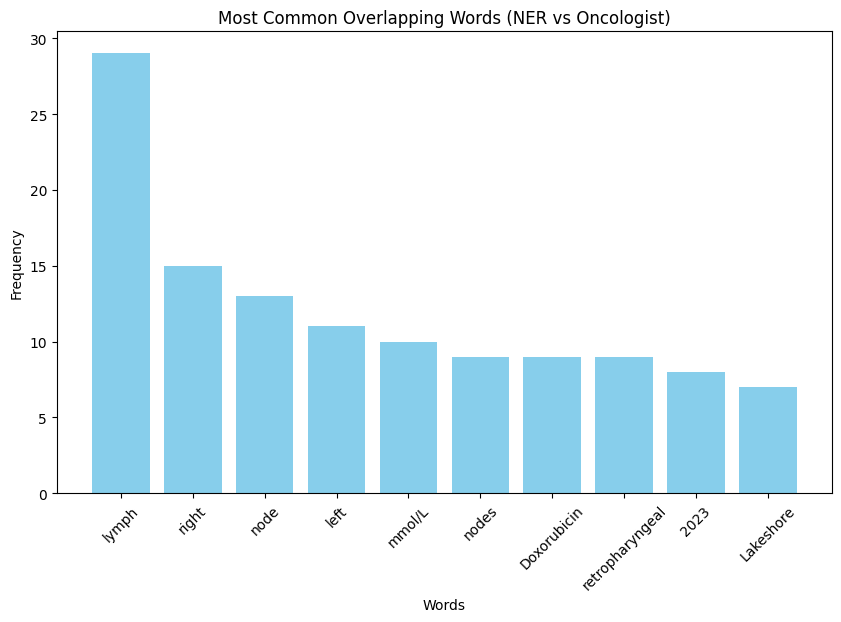

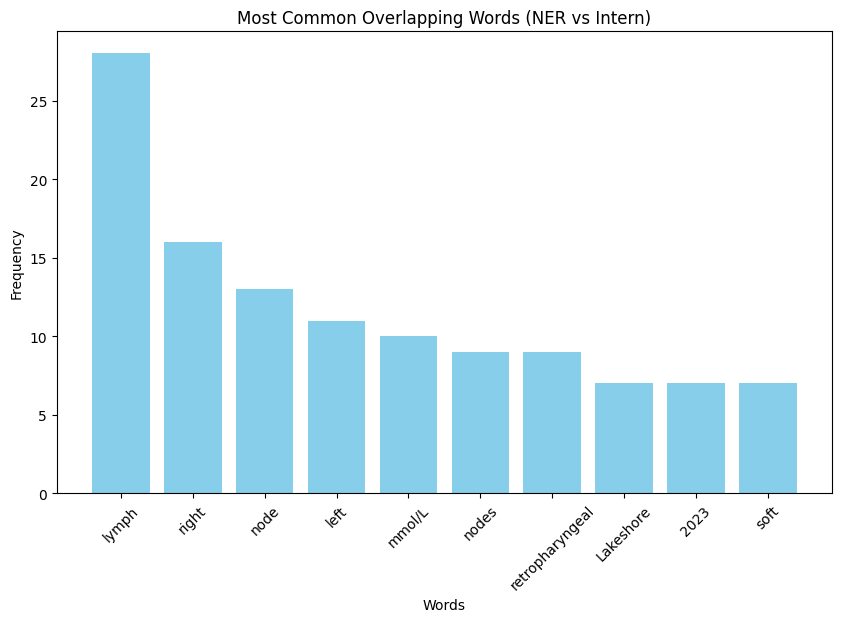

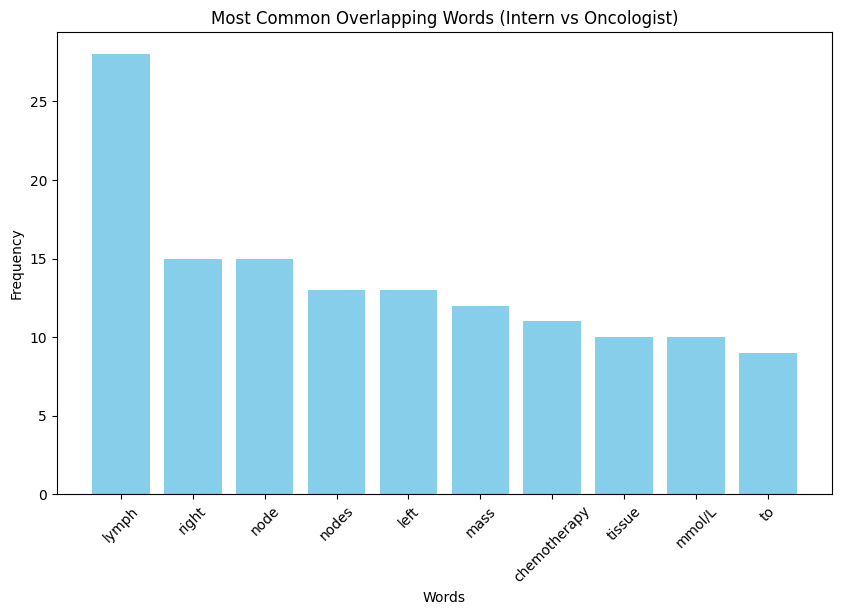

In [17]:
import matplotlib.pyplot as plt

# Function to plot the most common words
def plot_common_words(common_words, title):
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plotting common words for AI vs CP
plot_common_words(common_words_ai_cp, "Most Common Overlapping Words (NER vs Oncologist)")

# Plotting common words for AI vs AP
plot_common_words(common_words_ai_ap, "Most Common Overlapping Words (NER vs Intern)")

# Plotting common words for AP vs CP
plot_common_words(common_words_ap_cp, "Most Common Overlapping Words (Intern vs Oncologist)")

##Plot Discrepancies

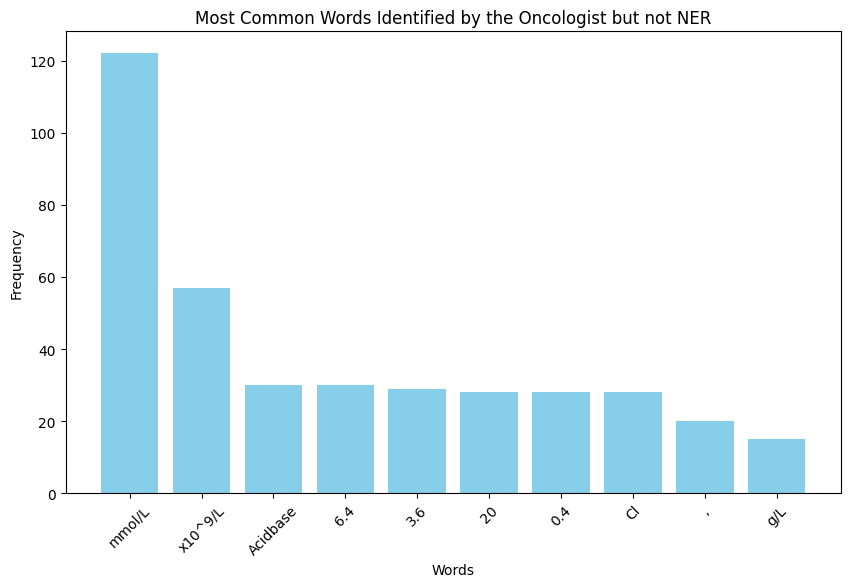

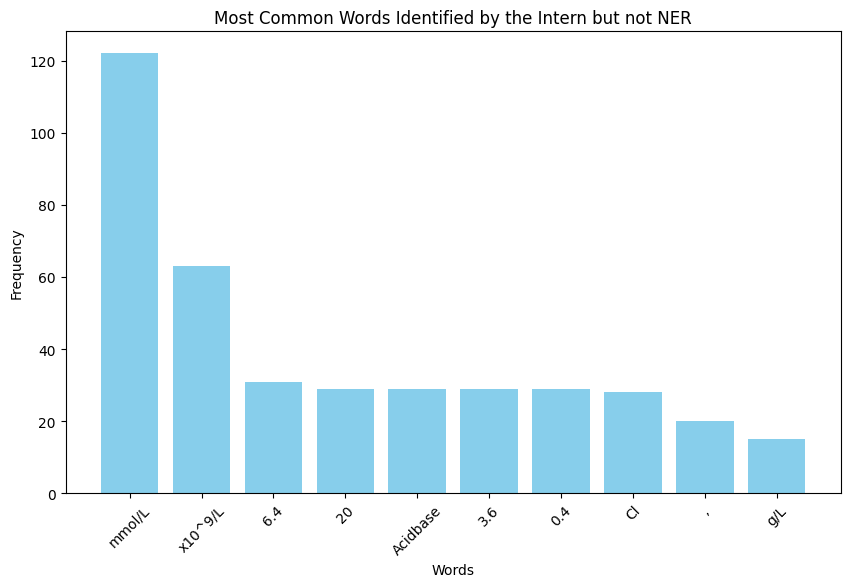

In [18]:
import matplotlib.pyplot as plt

# Function to plot the most common words
def plot_discrepancies(common_words, title):
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plotting common words for AI vs CP
plot_discrepancies(discrepancies_ai_cp, "Most Common Words Identified by the Oncologist but not NER")

# Plotting common words for AI vs AP
plot_discrepancies(discrepancies_ai_ap, "Most Common Words Identified by the Intern but not NER")

# Plotting common words for AP vs CP
#plot_discrepancies(common_words_ap_cp, "Most Common Overlapping Words (Intern vs Oncologist)")

# NER Peformance Metrics

In [16]:
import pandas as pd

# Load the Excel file
file_path = '/content/Summary_Notebook.xlsx'

# Read the sheets
sheets = pd.read_excel(file_path, sheet_name=None)

# Display the names of the sheets and the first few rows of each sheet
sheet_summaries = {sheet_name: data.head() for sheet_name, data in sheets.items()}
sheet_summaries.keys(), list(sheet_summaries.values())[0]  # Show sheet names and first sheet's preview



(dict_keys(['STS_Summary', 'Lymphoma_Summary', 'Hemangiosarcoma_Summary', 'DiagnosticCT_Summary']),
          Token_Words_AI        Token_Words_CP        Token_Words_AP
 0           Soft tissue   Soft Tissue Sarcoma   Soft tissue sarcoma
 1  sarcoma incompletely               Grade I               Grade I
 2                   2mm  incompletely excised  incompletely excised
 3            incomplete                   2mm                   2mm
 4    Urate Urolithiasis       incomplete deep        Lateral Margin)

###NER Metrics: F1 Score, Recall and Precision on normalized data

In [17]:
import pandas as pd
import string

# Function to normalize text
def normalize_text(text):
    text = text.lower() # Makes all text lower case to remove ambiguity in evaluation of strings
    text = text.translate(str.maketrans('', '', string.punctuation)) # Removes any accidental input white space, especially for metrics for NER reliability
    return text

# Function to calculate metrics
def calculate_metrics(set1, set2):
    tp = len(set1.intersection(set2))
    fp = len(set1 - set2)
    fn = len(set2 - set1)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1_score

# Function to extract entities from a column
def get_entities_from_column(data, column_name):
    return set(data[column_name].dropna().unique())

# Load the Excel file
file_path = '/content/Summary_Notebook.xlsx'
sheets = pd.read_excel(file_path, sheet_name=None)

# Normalize the data in each sheet
for sheet_name, data in sheets.items():
    for column in data.columns:
        data[column] = data[column].astype(str).apply(normalize_text)

# Initialize combined sets
combined_sets = {'AP': set(), 'CP': set(), 'AI': set()}

# Initialize results dictionary
results = {}

# Process each sheet
for sheet_name, data in sheets.items():
    entities_ap = get_entities_from_column(data, 'Token_Words_AP')
    entities_cp = get_entities_from_column(data, 'Token_Words_CP')
    entities_ai = get_entities_from_column(data, 'Token_Words_AI')

    combined_sets['AP'] |= entities_ap
    combined_sets['CP'] |= entities_cp
    combined_sets['AI'] |= entities_ai

    results[sheet_name] = {
        'AP vs CP': calculate_metrics(entities_ap, entities_cp),
        'AI vs CP': calculate_metrics(entities_ai, entities_cp),
        'AI vs AP': calculate_metrics(entities_ai, entities_ap)
    }

# Calculate combined metrics
combined_metrics = {
    'AP vs CP': calculate_metrics(combined_sets['AP'], combined_sets['CP']),
    'AI vs CP': calculate_metrics(combined_sets['AI'], combined_sets['CP']),
    'AI vs AP': calculate_metrics(combined_sets['AI'], combined_sets['AP'])
}

results['Combined'] = combined_metrics

# Format the results
formatted_results = {sheet: {comparison: {'Precision': round(metrics[0], 2), 'Recall': round(metrics[1], 2), 'F1-Score': round(metrics[2], 2)}
                             for comparison, metrics in sheet_metrics.items()}
                     for sheet, sheet_metrics in results.items()}

formatted_results



{'STS_Summary': {'AP vs CP': {'Precision': 0.73,
   'Recall': 0.72,
   'F1-Score': 0.72},
  'AI vs CP': {'Precision': 0.39, 'Recall': 0.33, 'F1-Score': 0.35},
  'AI vs AP': {'Precision': 0.35, 'Recall': 0.3, 'F1-Score': 0.32}},
 'Lymphoma_Summary': {'AP vs CP': {'Precision': 0.66,
   'Recall': 0.76,
   'F1-Score': 0.71},
  'AI vs CP': {'Precision': 0.36, 'Recall': 0.46, 'F1-Score': 0.41},
  'AI vs AP': {'Precision': 0.35, 'Recall': 0.38, 'F1-Score': 0.37}},
 'Hemangiosarcoma_Summary': {'AP vs CP': {'Precision': 0.62,
   'Recall': 0.7,
   'F1-Score': 0.66},
  'AI vs CP': {'Precision': 0.38, 'Recall': 0.35, 'F1-Score': 0.36},
  'AI vs AP': {'Precision': 0.36, 'Recall': 0.29, 'F1-Score': 0.32}},
 'DiagnosticCT_Summary': {'AP vs CP': {'Precision': 0.57,
   'Recall': 0.65,
   'F1-Score': 0.61},
  'AI vs CP': {'Precision': 0.33, 'Recall': 0.32, 'F1-Score': 0.33},
  'AI vs AP': {'Precision': 0.32, 'Recall': 0.28, 'F1-Score': 0.3}},
 'Combined': {'AP vs CP': {'Precision': 0.62, 'Recall': 0.7, 

In [18]:
# Convert the formatted results to a DataFrame for better visualization

# Creating a list to hold the data for DataFrame
data_for_df = []

# Loop through each sheet and its metrics
for sheet, comparisons in formatted_results.items():
    for comparison, metrics in comparisons.items():
        # Adding each metric as a row in the list
        data_for_df.append([sheet, comparison, metrics['Precision'], metrics['Recall'], metrics['F1-Score']])

# Create DataFrame from the list
results_df = pd.DataFrame(data_for_df, columns=['Sheet', 'Comparison', 'Precision', 'Recall', 'F1-Score'])

results_df



,Sheet,Comparison,Precision,Recall,F1-Score
0,STS_Summary,AP vs CP,0.73,0.72,0.72
1,STS_Summary,AI vs CP,0.39,0.33,0.35
2,STS_Summary,AI vs AP,0.35,0.30,0.32
3,Lymphoma_Summary,AP vs CP,0.66,0.76,0.71
4,Lymphoma_Summary,AI vs CP,0.36,0.46,0.41
5,Lymphoma_Summary,AI vs AP,0.35,0.38,0.37
6,Hemangiosarcoma_Summary,AP vs CP,0.62,0.70,0.66
7,Hemangiosarcoma_Summary,AI vs CP,0.38,0.35,0.36
8,Hemangiosarcoma_Summary,AI vs AP,0.36,0.29,0.32
9,DiagnosticCT_Summary,AP vs CP,0.57,0.65,0.61


## NER Metrics with Confusion Matrix

{'STS_Summary': {'AP vs CP': {'Precision': 0.73, 'Recall': 0.72, 'F1-Score': 0.72}, 'AI vs CP': {'Precision': 0.39, 'Recall': 0.33, 'F1-Score': 0.35}, 'AI vs AP': {'Precision': 0.35, 'Recall': 0.3, 'F1-Score': 0.32}}, 'Lymphoma_Summary': {'AP vs CP': {'Precision': 0.66, 'Recall': 0.76, 'F1-Score': 0.71}, 'AI vs CP': {'Precision': 0.36, 'Recall': 0.46, 'F1-Score': 0.41}, 'AI vs AP': {'Precision': 0.35, 'Recall': 0.38, 'F1-Score': 0.37}}, 'Hemangiosarcoma_Summary': {'AP vs CP': {'Precision': 0.62, 'Recall': 0.7, 'F1-Score': 0.66}, 'AI vs CP': {'Precision': 0.38, 'Recall': 0.35, 'F1-Score': 0.36}, 'AI vs AP': {'Precision': 0.36, 'Recall': 0.29, 'F1-Score': 0.32}}, 'DiagnosticCT_Summary': {'AP vs CP': {'Precision': 0.57, 'Recall': 0.65, 'F1-Score': 0.61}, 'AI vs CP': {'Precision': 0.33, 'Recall': 0.32, 'F1-Score': 0.33}, 'AI vs AP': {'Precision': 0.32, 'Recall': 0.28, 'F1-Score': 0.3}}, 'Combined': {'AP vs CP': {'Precision': 0.62, 'Recall': 0.7, 'F1-Score': 0.66}, 'AI vs CP': {'Precision':

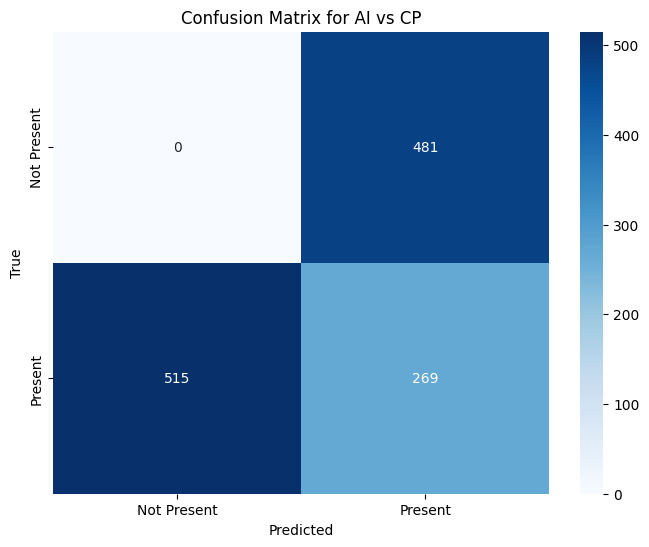

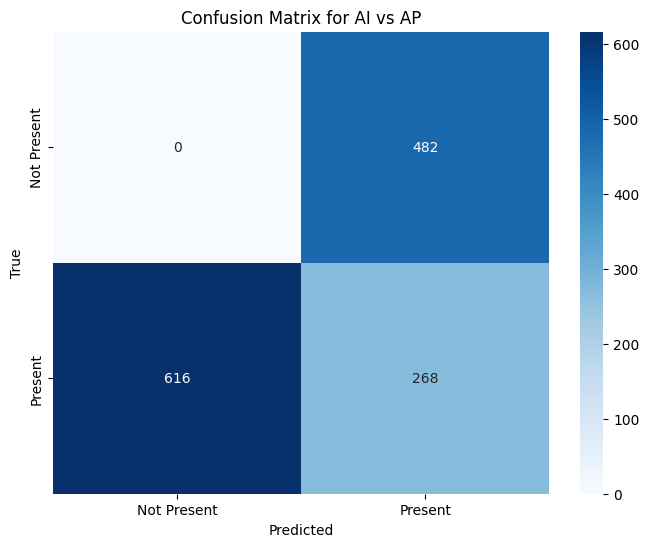

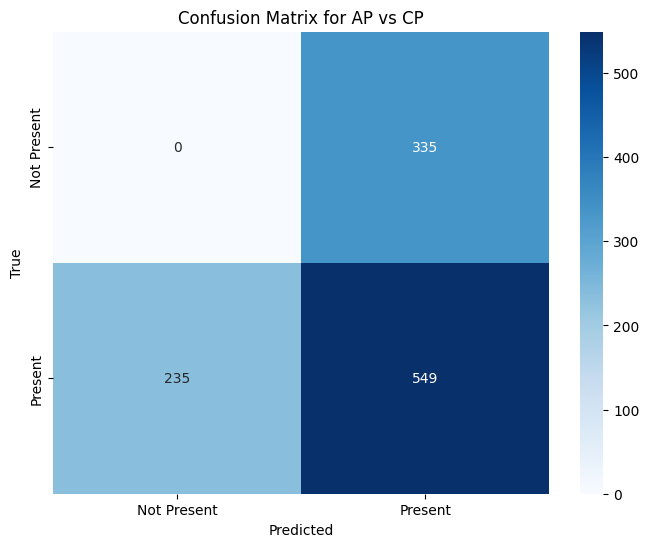

In [19]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to normalize text
def normalize_text(text):
    text = text.lower()  # Makes all text lower case to remove ambiguity in evaluation of strings
    text = text.translate(str.maketrans('', '', string.punctuation))  # Removes any accidental input white space, especially for metrics for NER reliability
    return text

# Function to calculate metrics
def calculate_metrics(set1, set2):
    tp = len(set1.intersection(set2))
    fp = len(set1 - set2)
    fn = len(set2 - set1)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1_score

# Function to extract entities from a column
def get_entities_from_column(data, column_name):
    return set(data[column_name].dropna().unique())

# Load the Excel file
file_path = '/content/Summary_Notebook.xlsx'
sheets = pd.read_excel(file_path, sheet_name=None)

# Normalize the data in each sheet
for sheet_name, data in sheets.items():
    for column in data.columns:
        data[column] = data[column].astype(str).apply(normalize_text)

# Initialize combined sets
combined_sets = {'AP': set(), 'CP': set(), 'AI': set()}

# Initialize results dictionary
results = {}

# Process each sheet
for sheet_name, data in sheets.items():
    entities_ap = get_entities_from_column(data, 'Token_Words_AP')
    entities_cp = get_entities_from_column(data, 'Token_Words_CP')
    entities_ai = get_entities_from_column(data, 'Token_Words_AI')

    combined_sets['AP'] |= entities_ap
    combined_sets['CP'] |= entities_cp
    combined_sets['AI'] |= entities_ai

    results[sheet_name] = {
        'AP vs CP': calculate_metrics(entities_ap, entities_cp),
        'AI vs CP': calculate_metrics(entities_ai, entities_cp),
        'AI vs AP': calculate_metrics(entities_ai, entities_ap)
    }

# Calculate combined metrics
combined_metrics = {
    'AP vs CP': calculate_metrics(combined_sets['AP'], combined_sets['CP']),
    'AI vs CP': calculate_metrics(combined_sets['AI'], combined_sets['CP']),
    'AI vs AP': calculate_metrics(combined_sets['AI'], combined_sets['AP'])
}

results['Combined'] = combined_metrics

# Format the results
formatted_results = {sheet: {comparison: {'Precision': round(metrics[0], 2), 'Recall': round(metrics[1], 2), 'F1-Score': round(metrics[2], 2)}
                             for comparison, metrics in sheet_metrics.items()}
                     for sheet, sheet_metrics in results.items()}

# Print formatted results
print(formatted_results)

# Calculate and visualize confusion matrices for each comparison
def create_confusion_matrix(true_set, pred_set):
    all_labels = list(true_set | pred_set)
    y_true = [1 if label in true_set else 0 for label in all_labels]
    y_pred = [1 if label in pred_set else 0 for label in all_labels]
    return confusion_matrix(y_true, y_pred)

comparisons = {
    'AI vs CP': (combined_sets['CP'], combined_sets['AI']),
    'AI vs AP': (combined_sets['AP'], combined_sets['AI']),
    'AP vs CP': (combined_sets['CP'], combined_sets['AP'])
}

# Plot each confusion matrix
for comparison, (true_set, pred_set) in comparisons.items():
    conf_matrix = create_confusion_matrix(true_set, pred_set)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Present', 'Present'], yticklabels=['Not Present', 'Present'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {comparison}')
    plt.show()



#Jaccard Similarity - Token Words


In [20]:
import pandas as pd

def jaccard_similarity(set1, set2):
    """Calculate the Jaccard Similarity between two sets."""
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

def calculate_jaccard_for_sheet(sheet_data):
    """Calculate Jaccard Similarity for AI_AP, AI_CP, and AP_CP for a given sheet."""
    # Tokenize and create sets of words
    ai_tokens = set(sheet_data['Token_Words_AI'].dropna().astype(str).split())
    ap_tokens = set(sheet_data['Token_Words_AP'].dropna().astype(str).split())
    cp_tokens = set(sheet_data['Token_Words_CP'].dropna().astype(str).split())

    # Calculate Jaccard Similarity
    jaccard_ai_ap = jaccard_similarity(ai_tokens, ap_tokens)
    jaccard_ai_cp = jaccard_similarity(ai_tokens, cp_tokens)
    jaccard_ap_cp = jaccard_similarity(ap_tokens, cp_tokens)

    return jaccard_ai_ap, jaccard_ai_cp, jaccard_ap_cp


In [21]:
import pandas as pd

# Load the Excel file
excel_data = pd.ExcelFile('/content/Summary_Notebook.xlsx')
sheet_names = excel_data.sheet_names

# Function to calculate Jaccard Similarity
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union) if union else 0

# Function to tokenize text and create sets of words
def tokenize_text_to_set(column_data):
    # Remove NaN values, tokenize and create a set of words
    return set(column_data.dropna().astype(str).str.split().sum())

# Initialize a dictionary to hold all Jaccard similarity results
jaccard_results = {}

# Calculate Jaccard Similarity for each sheet
for sheet in sheet_names:
    data = pd.read_excel(excel_data, sheet_name=sheet)
    ai_tokens = tokenize_text_to_set(data['Token_Words_AI'])
    ap_tokens = tokenize_text_to_set(data['Token_Words_AP'])
    cp_tokens = tokenize_text_to_set(data['Token_Words_CP'])

    # Calculate and store the Jaccard similarity for this sheet
    jaccard_results[sheet] = {
        'AI_AP': jaccard_similarity(ai_tokens, ap_tokens),
        'AI_CP': jaccard_similarity(ai_tokens, cp_tokens),
        'AP_CP': jaccard_similarity(ap_tokens, cp_tokens)
    }

# Calculate Jaccard Similarity for All Summary
all_ai_tokens = set()
all_ap_tokens = set()
all_cp_tokens = set()

# Concatenate tokens from all sheets
for sheet in sheet_names:
    data = pd.read_excel(excel_data, sheet_name=sheet)
    all_ai_tokens |= tokenize_text_to_set(data['Token_Words_AI'])
    all_ap_tokens |= tokenize_text_to_set(data['Token_Words_AP'])
    all_cp_tokens |= tokenize_text_to_set(data['Token_Words_CP'])

# Calculate and store the Jaccard similarity for All Summary
jaccard_results['All_Summary'] = {
    'AI_AP': jaccard_similarity(all_ai_tokens, all_ap_tokens),
    'AI_CP': jaccard_similarity(all_ai_tokens, all_cp_tokens),
    'AP_CP': jaccard_similarity(all_ap_tokens, all_cp_tokens)
}

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(jaccard_results).T

# Display the results
results_df


,AI_AP,AI_CP,AP_CP
STS_Summary,0.407547,0.437262,0.695652
Lymphoma_Summary,0.464945,0.503968,0.715596
Hemangiosarcoma_Summary,0.528545,0.605372,0.730689
DiagnosticCT_Summary,0.585047,0.593186,0.691571
All_Summary,0.540412,0.564736,0.717373


# Jaccard Similarity Token Category

In [23]:
# Load the new Excel file for Token Category comparison
excel_data_category = pd.ExcelFile('/content/TokenCategoryComparison.xlsx')
sheet_names = excel_data_category.sheet_names

# Initialize a dictionary to hold all Jaccard similarity results for token categories
jaccard_results_category = {}

# Calculate Jaccard Similarity for each sheet for token categories
for sheet in sheet_names:
    data = pd.read_excel(excel_data_category, sheet_name=sheet)
    ai_tokens = tokenize_text_to_set(data['Token_Category_AI'])
    ap_tokens = tokenize_text_to_set(data['Token_Category_AP'])
    cp_tokens = tokenize_text_to_set(data['Token_Category_CP'])

    # Calculate and store the Jaccard similarity for this sheet
    jaccard_results_category[sheet] = {
        'AI_AP': jaccard_similarity(ai_tokens, ap_tokens),
        'AI_CP': jaccard_similarity(ai_tokens, cp_tokens),
        'AP_CP': jaccard_similarity(ap_tokens, cp_tokens)
    }

# Calculate Jaccard Similarity for All Summary for token categories
all_ai_tokens_category = set()
all_ap_tokens_category = set()
all_cp_tokens_category = set()

# Concatenate tokens from all sheets for token categories
for sheet in sheet_names:
    data = pd.read_excel(excel_data_category, sheet_name=sheet)
    all_ai_tokens_category |= tokenize_text_to_set(data['Token_Category_AI'])
    all_ap_tokens_category |= tokenize_text_to_set(data['Token_Category_AP'])
    all_cp_tokens_category |= tokenize_text_to_set(data['Token_Category_CP'])

# Calculate and store the Jaccard similarity for All Summary for token categories
jaccard_results_category['All_Summary'] = {
    'AI_AP': jaccard_similarity(all_ai_tokens_category, all_ap_tokens_category),
    'AI_CP': jaccard_similarity(all_ai_tokens_category, all_cp_tokens_category),
    'AP_CP': jaccard_similarity(all_ap_tokens_category, all_cp_tokens_category)
}

# Convert the results to a DataFrame for better visualization
results_df_category = pd.DataFrame(jaccard_results_category).T

# Display the results
results_df_category


,AI_AP,AI_CP,AP_CP
STS_Summary,0.500000,0.620690,0.774194
Lymphoma_Summary,0.533333,0.620690,0.814815
Hemangiosarcoma_Summary,0.583333,0.583333,0.692308
DiagnosticCT_Summary,0.531250,0.593750,0.600000
All_Summary,0.547619,0.604651,0.632653


# Intra-Rater Reliability

In [24]:
import pandas as pd
from openpyxl import load_workbook

# Load the workbook
file_path_intra_rater = '/content/IntraraterreliabilityData.xlsx'
wb_intra_rater = load_workbook(filename=file_path_intra_rater)

# List all sheet names
sheet_names_intra_rater = wb_intra_rater.sheetnames

# Load each sheet into a dictionary of DataFrames for intra-rater reliability analysis
sheets_data_intra_rater = {sheet_name: pd.read_excel(file_path_intra_rater, sheet_name=sheet_name) for sheet_name in sheet_names_intra_rater}

# Function to calculate adjusted consistency score for an observer, excluding blanks
def calculate_adjusted_cohens_kappa_for_observer(observer_columns):
    # Aggregate observer data from all sheets, excluding blank entries
    observer_data_aggregated = pd.concat([df[df[observer_columns[0]] != ''][observer_columns] for df in sheets_data_intra_rater.values() if df[observer_columns[0]].dtype == object])

    # Ensure all entries are treated as strings and exclude blank spaces
    observer_data_aggregated = observer_data_aggregated.dropna().astype(str)
    observer_data_aggregated = observer_data_aggregated[observer_data_aggregated[observer_columns[0]].str.strip() != '']

    # Count how many times each word was assigned to each category
    word_category_counts = observer_data_aggregated.groupby(observer_columns).size().reset_index(name='counts')

    # Find the most frequent category assignment for each word
    max_counts_per_word = word_category_counts.groupby(observer_columns[0])['counts'].transform(max)
    gold_standard = word_category_counts[word_category_counts['counts'] == max_counts_per_word]

    # Calculate a simplified consistency score
    consistency_matches = gold_standard[gold_standard.groupby(observer_columns[0])[observer_columns[1]].transform('nunique') == 1]
    total_words_considered = word_category_counts[observer_columns[0]].nunique()
    consistency_score = len(consistency_matches) / total_words_considered if total_words_considered > 0 else 0

    return consistency_score

# Calculate adjusted consistency scores for each observer, excluding blanks
ai_adjusted_consistency_score = calculate_adjusted_cohens_kappa_for_observer(['Token_Words_AI', 'Token_Category_AI'])
intern_adjusted_consistency_score = calculate_adjusted_cohens_kappa_for_observer(['Token_Words_AP', 'Token_Category_AP'])
oncologist_adjusted_consistency_score = calculate_adjusted_cohens_kappa_for_observer(['Token_Words_CP', 'Token_Category_CP'])

# Compile the adjusted consistency scores into a table
adjusted_consistency_scores_table = pd.DataFrame({
    'Observer': ['AI', 'Intern (AP)', 'Oncologist (CP)'],
    'Adjusted Consistency Score': [ai_adjusted_consistency_score, intern_adjusted_consistency_score, oncologist_adjusted_consistency_score]
})

# Display the table
print(adjusted_consistency_scores_table)


          Observer  Adjusted Consistency Score
0               AI                    0.983376
1      Intern (AP)                    0.966216
2  Oncologist (CP)                    0.974969


<ipython-input-24-4adb38361d45>:27: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_counts_per_word = word_category_counts.groupby(observer_columns[0])['counts'].transform(max)
<ipython-input-24-4adb38361d45>:27: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_counts_per_word = word_category_counts.groupby(observer_columns[0])['counts'].transform(max)
<ipython-input-24-4adb38361d45>:27: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
 